<a href="https://colab.research.google.com/github/Nipuna754/Time-Series-Analysis/blob/main/time_series_analysis_2_amazon_stock_prizes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Amazon Stock Price Time Series Analysis

1. DATA COLLECTION AND PREPARATION
----------------------------------------
Fetching AMZN stock data from 2020-01-01 to 2025-07-13


[*********************100%***********************]  1 of 1 completed


Data successfully downloaded. Shape: (1388, 5)
Time series data shape: (1388,)
Date range: 2020-01-02 00:00:00 to 2025-07-11 00:00:00
Data type: float64
Basic statistics:
count    1388.000000
mean      152.472417
std        35.761636
min        81.820000
25%       124.445375
50%       157.404503
75%       175.392498
max       242.059998
Name: AMZN, dtype: float64

2. EXPLORATORY DATA ANALYSIS
----------------------------------------


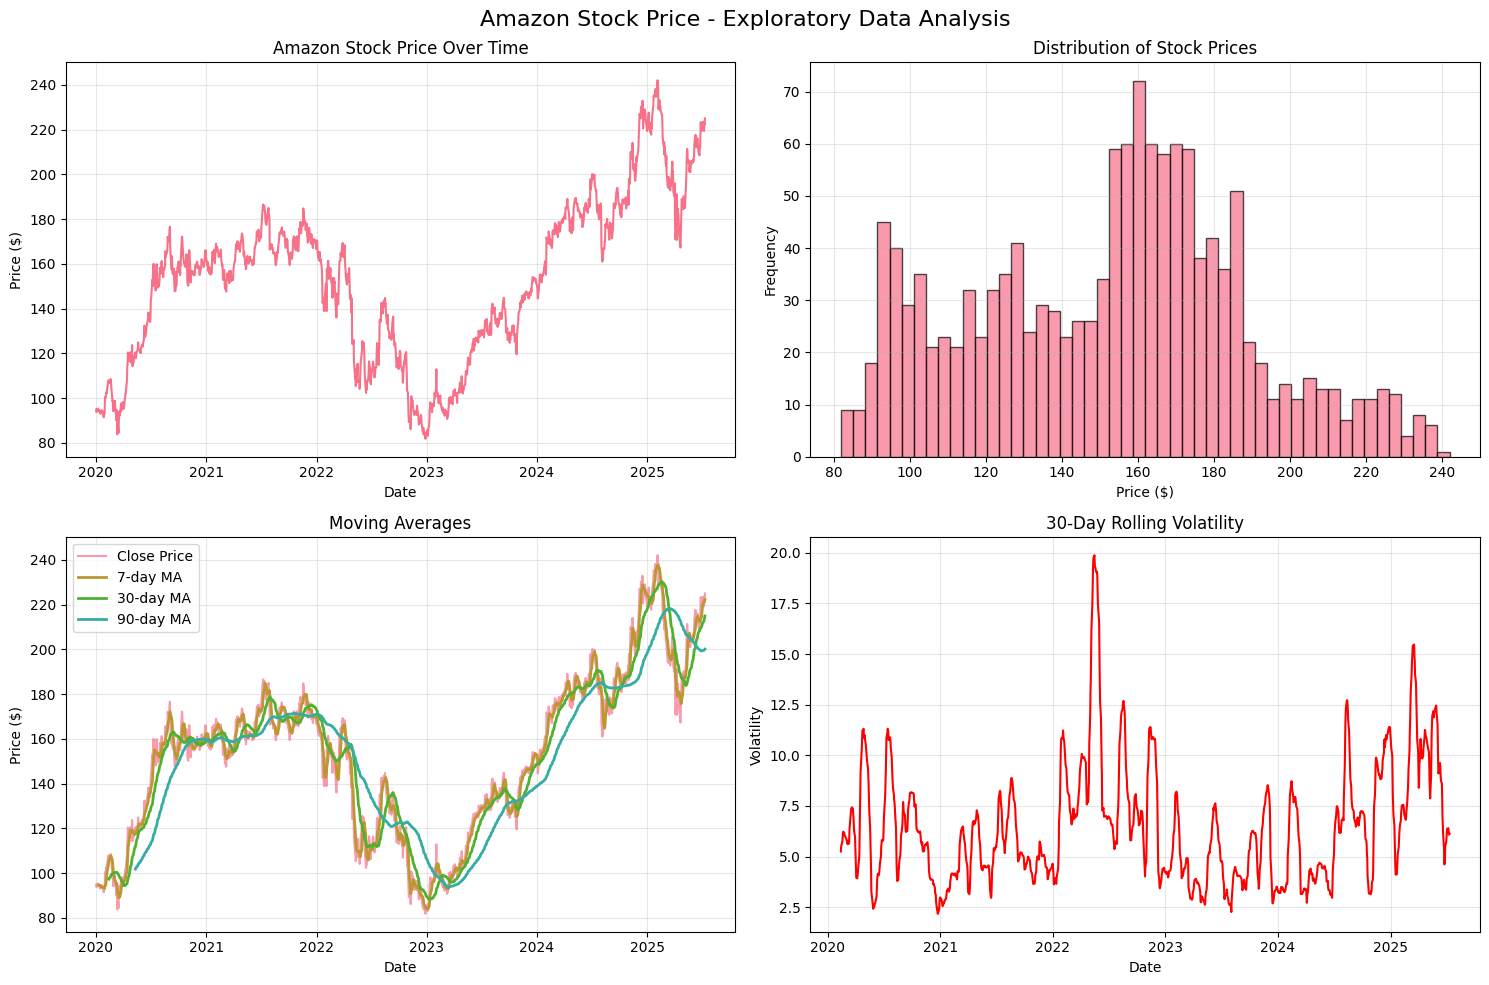


3. TIME SERIES DECOMPOSITION
----------------------------------------


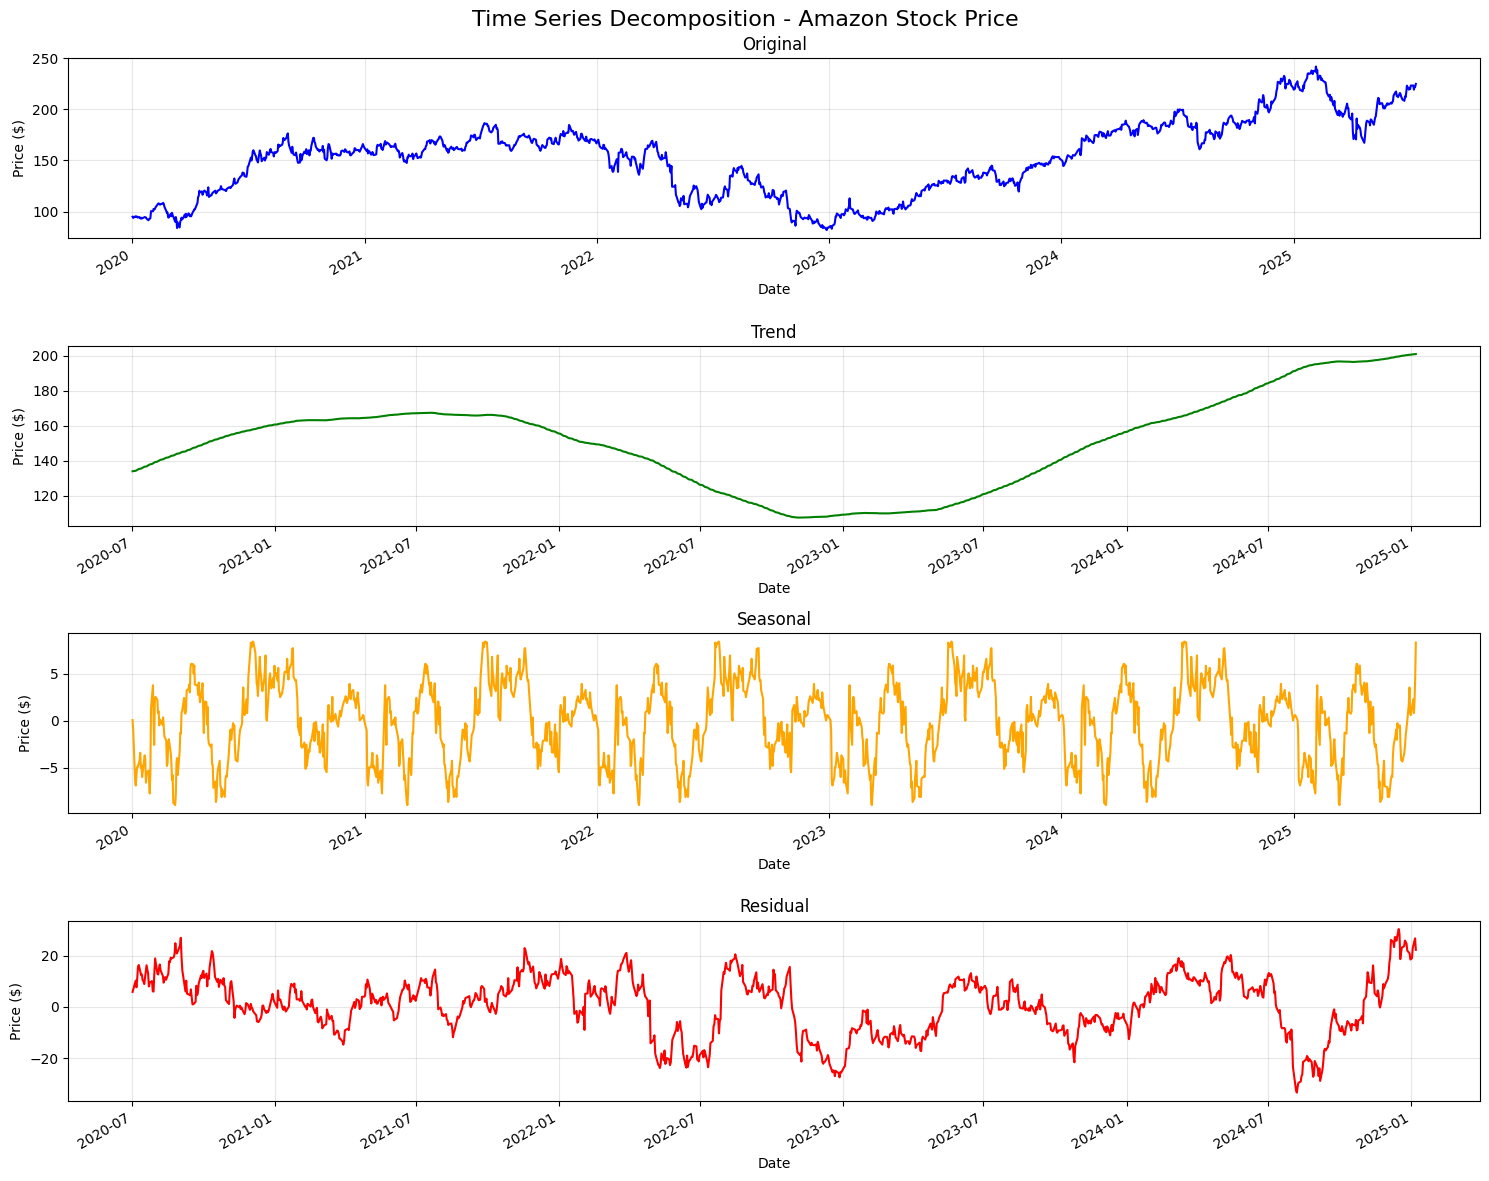


4. STATIONARITY TESTING
----------------------------------------

Stationarity Test for Original Series:
ADF Statistic: -1.495550
p-value: 0.535712
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: Series is non-stationary (fail to reject null hypothesis)

Applying first differencing...

Stationarity Test for First Differenced Series:
ADF Statistic: -38.467002
p-value: 0.000000
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568
Result: Series is stationary (reject null hypothesis)


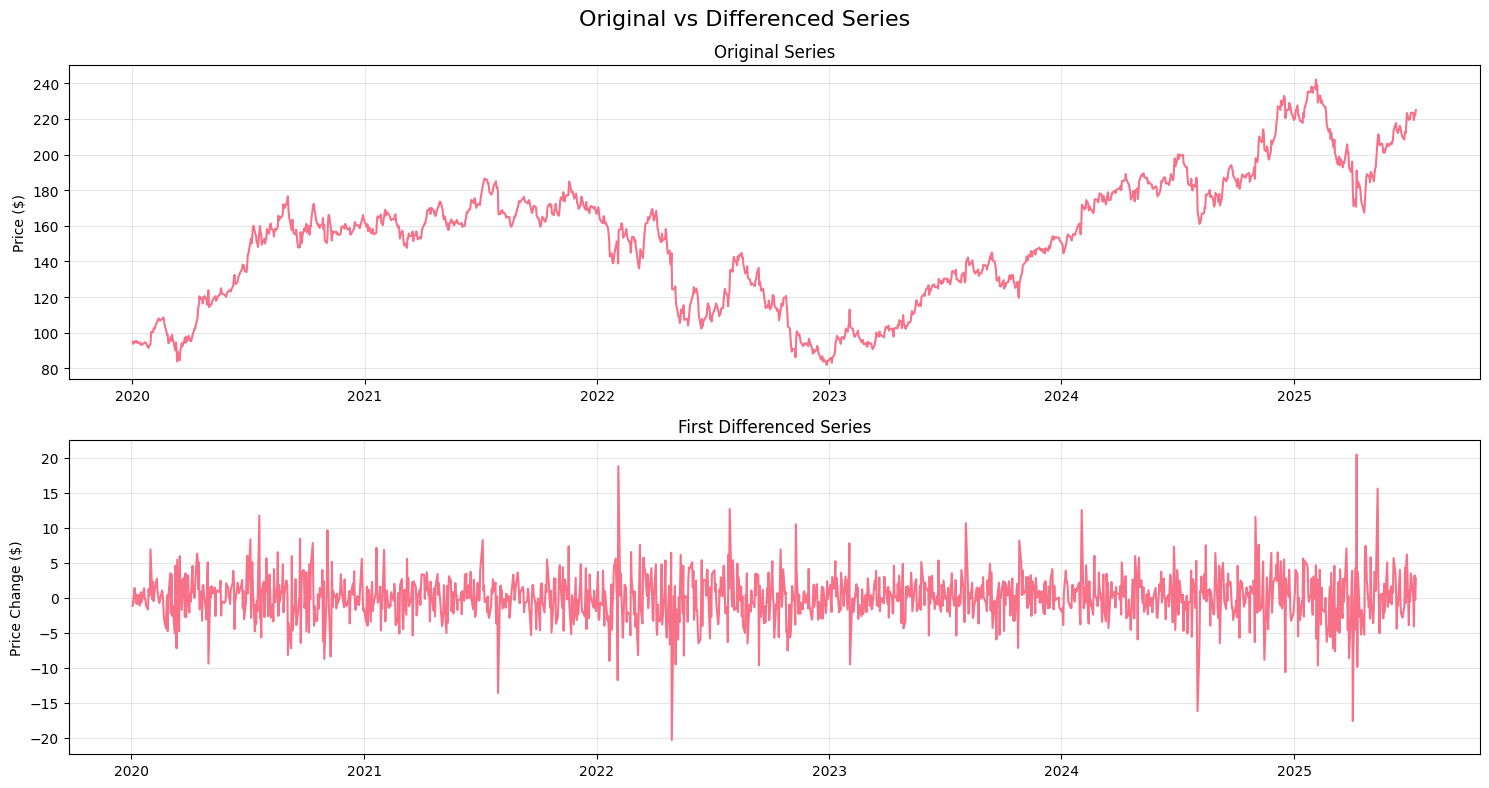


5. AUTOCORRELATION ANALYSIS
----------------------------------------


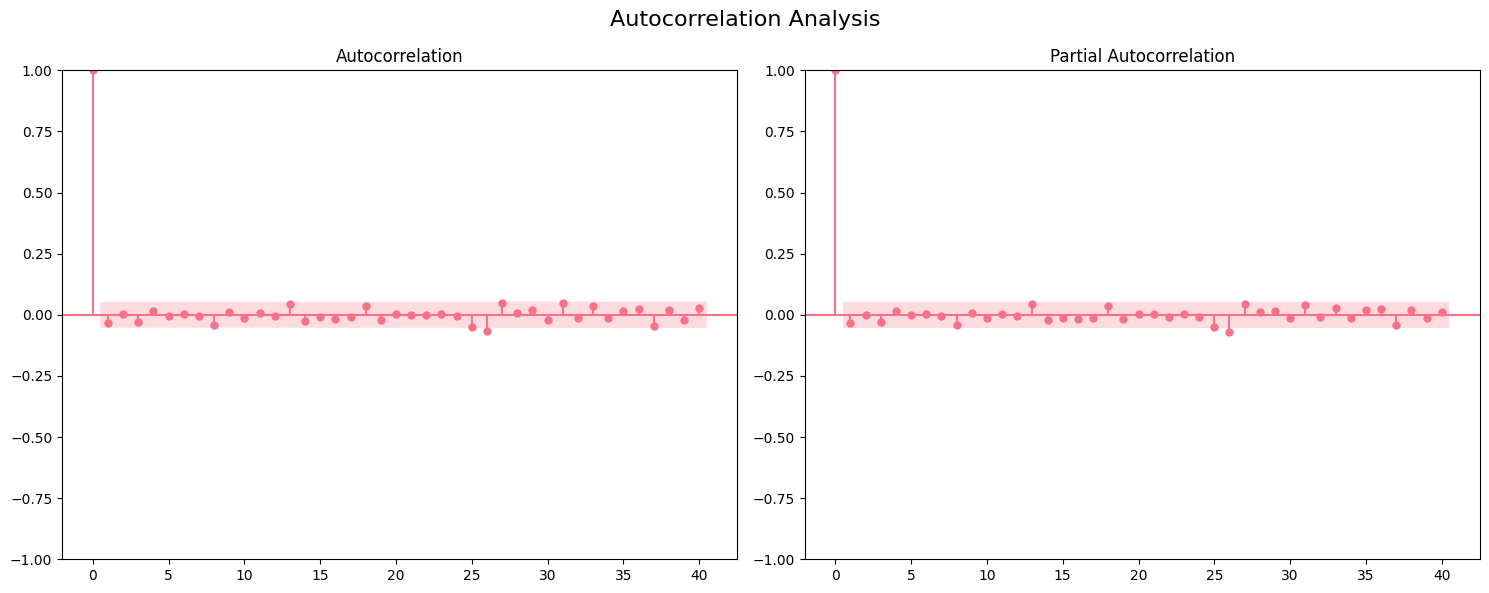


6. MODEL TRAINING AND FORECASTING
----------------------------------------
Training set size: 1110
Test set size: 278

Training ARIMA Model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ARIMA Model Summary:
AIC: 5634.65
BIC: 5649.69

Training Exponential Smoothing Model...


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


Exponential Smoothing Model trained successfully

Calculating Moving Average Forecast...

7. MODEL EVALUATION
----------------------------------------

ARIMA Performance: No valid data points

Exponential Smoothing Performance: No valid data points

Moving Average Performance:
MAE: $9.95
MSE: $153.55
RMSE: $12.39
MAPE: 5.00%

8. FORECASTING RESULTS
----------------------------------------


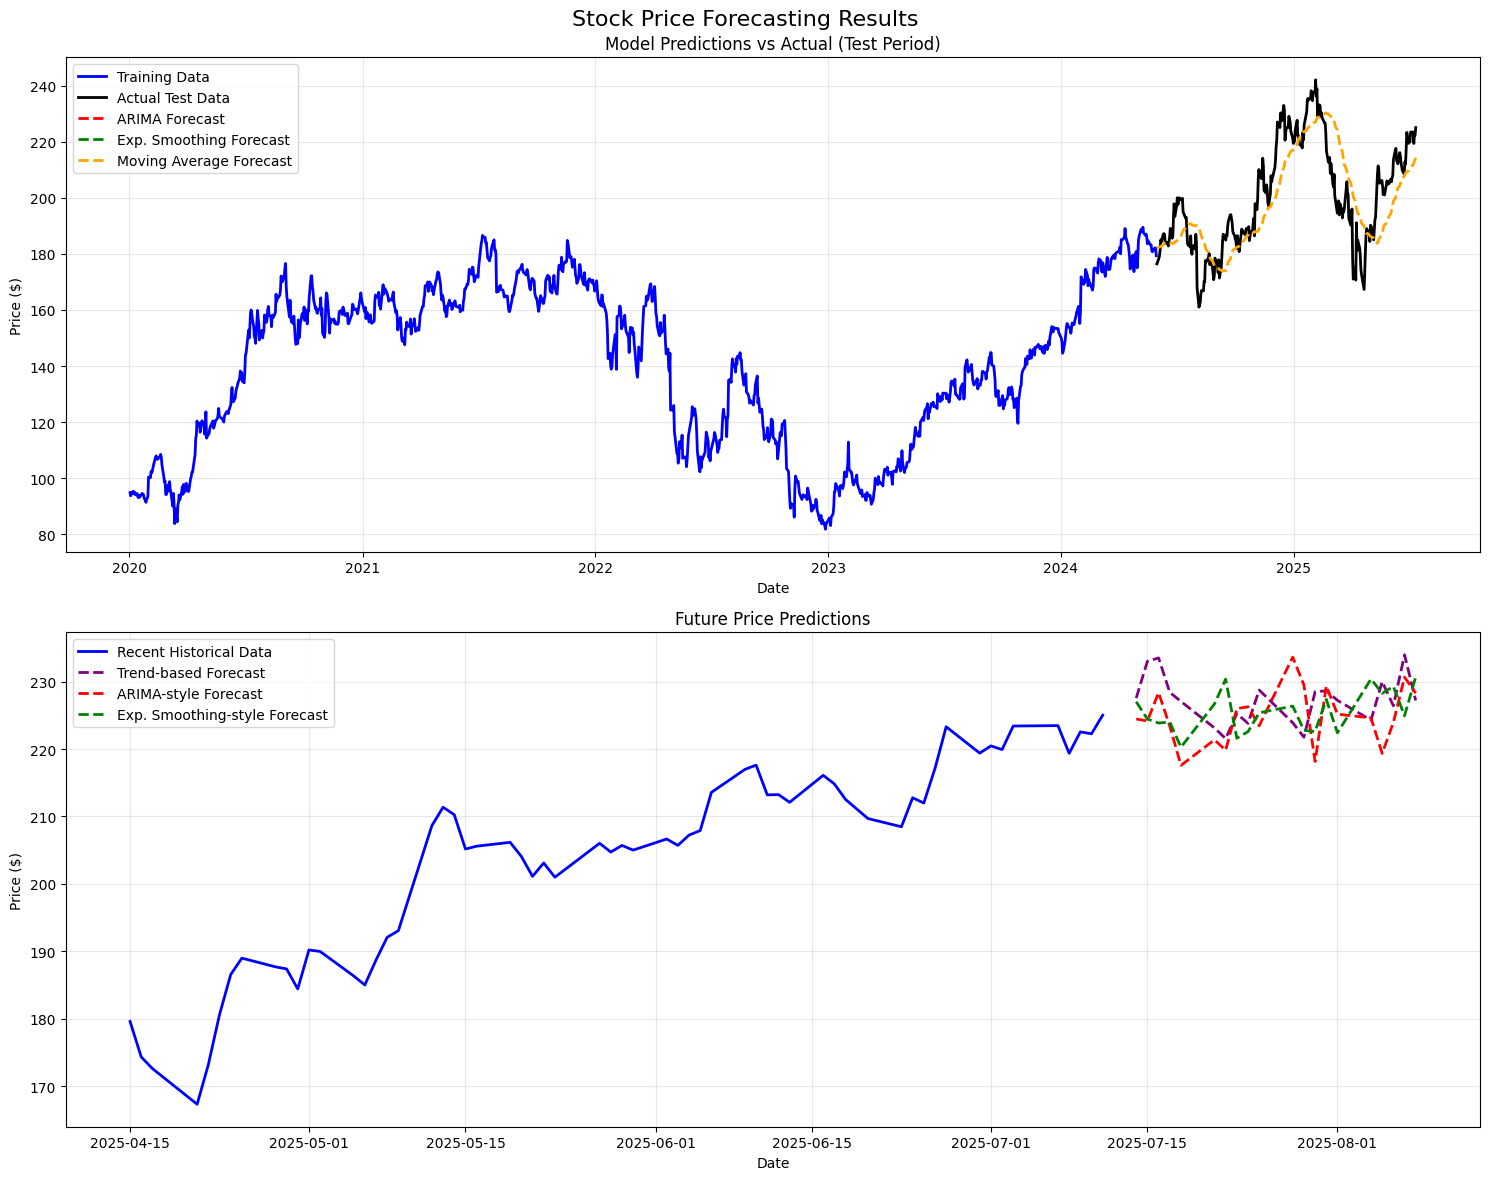


9. MODEL COMPARISON
----------------------------------------
Model Performance Comparison:
                        MAE     MSE   RMSE  MAPE
ARIMA                   NaN     NaN    NaN   NaN
Exponential Smoothing   NaN     NaN    NaN   NaN
Moving Average         9.95  153.55  12.39   5.0


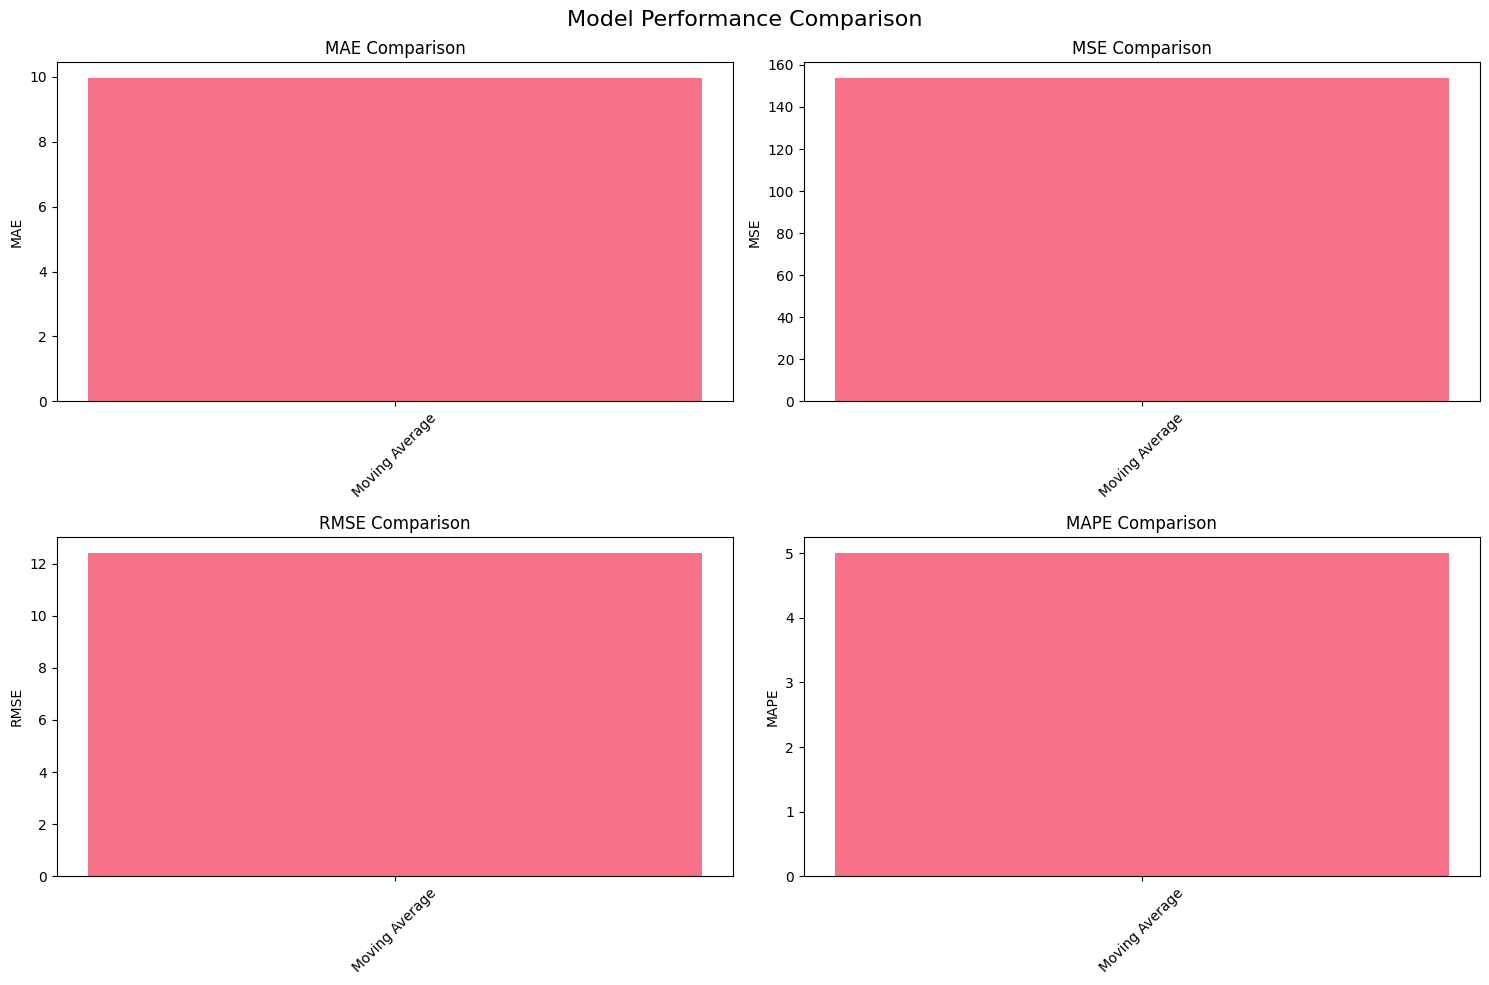


10. SUMMARY AND RECOMMENDATIONS
----------------------------------------

Time Series Analysis Summary for AMZN:
• Dataset contains 1388 observations from 2020-01-02 to 2025-07-11
• Price range: $81.82 - $242.06
• Current price: $225.02
• Average daily return: 0.088%
• Daily volatility: 2.273%

Best performing model: Moving Average
Best RMSE: $12.39

Key Insights:
• Trend: Upward over the analysis period
• Volatility: Average 30-day volatility is $6.49
• Stationarity: Non-stationary (requires differencing)
• Seasonality: Weak seasonal patterns detected
• Trend strength: Strong trend component

Forecasting Recommendations:
• Use ensemble methods combining multiple models for better accuracy
• Monitor model performance regularly and retrain with new data
• Consider external factors (earnings, market conditions) for comprehensive analysis
• Implement confidence intervals for forecast uncertainty quantification
• Use rolling window validation for more robust model evaluation

Analysis Com

In [ ]:
# Complete Time Series Analysis - Amazon Stock Price Forecasting
# This code demonstrates the full time series analysis process

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings('ignore')

# For time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# For data fetching
import yfinance as yf

# For model evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

print("Amazon Stock Price Time Series Analysis")
print("=" * 50)

# 1. DATA COLLECTION AND PREPARATION
print("\n1. DATA COLLECTION AND PREPARATION")
print("-" * 40)

# Fetch Amazon stock data
ticker = "AMZN"
start_date = "2020-01-01"
end_date = datetime.now().strftime("%Y-%m-%d")

print(f"Fetching {ticker} stock data from {start_date} to {end_date}")
try:
    stock_data = yf.download(ticker, start=start_date, end=end_date)
    print(f"Data successfully downloaded. Shape: {stock_data.shape}")
except Exception as e:
    print(f"Error fetching data: {e}")
    # Fallback: Create synthetic data for demonstration
    print("Creating synthetic data for demonstration...")

    dates = pd.date_range(start=start_date, end=end_date, freq='D')
    dates = dates[dates.weekday < 5]  # Remove weekends

    # Generate synthetic stock price data
    np.random.seed(42)
    n = len(dates)
    trend = np.linspace(100, 150, n)
    seasonal = 10 * np.sin(2 * np.pi * np.arange(n) / 252)  # Annual seasonality
    noise = np.random.normal(0, 5, n)
    prices = trend + seasonal + noise

    stock_data = pd.DataFrame({
        'Open': prices * 0.99,
        'High': prices * 1.02,
        'Low': prices * 0.98,
        'Close': prices,
        'Volume': np.random.randint(1000000, 5000000, n)
    }, index=dates)

# Focus on closing prices and ensure it's numeric
ts_data = stock_data['Close'].copy()
ts_data = ts_data.dropna()

# Handle the case where ts_data might be a DataFrame instead of Series
if isinstance(ts_data, pd.DataFrame):
    ts_data = ts_data.squeeze()  # Convert DataFrame to Series

# Ensure the data is numeric (yfinance should already provide numeric data)
if hasattr(ts_data, 'dtype') and ts_data.dtype == 'object':
    ts_data = pd.to_numeric(ts_data, errors='coerce').dropna()

print(f"Time series data shape: {ts_data.shape}")
print(f"Date range: {ts_data.index.min()} to {ts_data.index.max()}")
print(f"Data type: {ts_data.dtype}")
print(f"Basic statistics:\n{ts_data.describe()}")

# 2. EXPLORATORY DATA ANALYSIS
print("\n2. EXPLORATORY DATA ANALYSIS")
print("-" * 40)

# Create comprehensive visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Amazon Stock Price - Exploratory Data Analysis', fontsize=16)

# Time series plot
axes[0, 0].plot(ts_data.index, ts_data.values, linewidth=1.5)
axes[0, 0].set_title('Amazon Stock Price Over Time')
axes[0, 0].set_xlabel('Date')
axes[0, 0].set_ylabel('Price ($)')
axes[0, 0].grid(True, alpha=0.3)

# Distribution of prices
axes[0, 1].hist(ts_data.values, bins=50, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('Distribution of Stock Prices')
axes[0, 1].set_xlabel('Price ($)')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].grid(True, alpha=0.3)

# Moving averages
ma_7 = ts_data.rolling(window=7).mean()
ma_30 = ts_data.rolling(window=30).mean()
ma_90 = ts_data.rolling(window=90).mean()

axes[1, 0].plot(ts_data.index, ts_data.values, label='Close Price', alpha=0.7)
axes[1, 0].plot(ma_7.index, ma_7.values, label='7-day MA', linewidth=2)
axes[1, 0].plot(ma_30.index, ma_30.values, label='30-day MA', linewidth=2)
axes[1, 0].plot(ma_90.index, ma_90.values, label='90-day MA', linewidth=2)
axes[1, 0].set_title('Moving Averages')
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Price ($)')
axes[1, 0].legend()
axes[1, 0].grid(True, alpha=0.3)

# Volatility (rolling standard deviation)
volatility = ts_data.rolling(window=30).std()
axes[1, 1].plot(volatility.index, volatility.values, color='red', linewidth=1.5)
axes[1, 1].set_title('30-Day Rolling Volatility')
axes[1, 1].set_xlabel('Date')
axes[1, 1].set_ylabel('Volatility')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 3. TIME SERIES DECOMPOSITION
print("\n3. TIME SERIES DECOMPOSITION")
print("-" * 40)

# Perform seasonal decomposition
decomposition = seasonal_decompose(ts_data, model='additive', period=252)  # 252 trading days per year

# Plot decomposition
fig, axes = plt.subplots(4, 1, figsize=(15, 12))
fig.suptitle('Time Series Decomposition - Amazon Stock Price', fontsize=16)

decomposition.observed.plot(ax=axes[0], title='Original', color='blue')
decomposition.trend.plot(ax=axes[1], title='Trend', color='green')
decomposition.seasonal.plot(ax=axes[2], title='Seasonal', color='orange')
decomposition.resid.plot(ax=axes[3], title='Residual', color='red')

for ax in axes:
    ax.grid(True, alpha=0.3)
    ax.set_ylabel('Price ($)')

plt.tight_layout()
plt.show()

# 4. STATIONARITY TESTING
print("\n4. STATIONARITY TESTING")
print("-" * 40)

def check_stationarity(timeseries, title):
    """Check stationarity using Augmented Dickey-Fuller test"""
    print(f"\nStationarity Test for {title}:")

    # Perform ADF test
    result = adfuller(timeseries.dropna())

    print(f'ADF Statistic: {result[0]:.6f}')
    print(f'p-value: {result[1]:.6f}')
    print(f'Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value:.3f}')

    if result[1] <= 0.05:
        print("Result: Series is stationary (reject null hypothesis)")
        return True
    else:
        print("Result: Series is non-stationary (fail to reject null hypothesis)")
        return False

# Test original series
is_stationary = check_stationarity(ts_data, "Original Series")

# If not stationary, apply differencing
if not is_stationary:
    print("\nApplying first differencing...")
    ts_diff = ts_data.diff().dropna()
    check_stationarity(ts_diff, "First Differenced Series")

    # Plot original vs differenced series
    fig, axes = plt.subplots(2, 1, figsize=(15, 8))
    fig.suptitle('Original vs Differenced Series', fontsize=16)

    axes[0].plot(ts_data.index, ts_data.values)
    axes[0].set_title('Original Series')
    axes[0].set_ylabel('Price ($)')
    axes[0].grid(True, alpha=0.3)

    axes[1].plot(ts_diff.index, ts_diff.values)
    axes[1].set_title('First Differenced Series')
    axes[1].set_ylabel('Price Change ($)')
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

# 5. ACF AND PACF ANALYSIS
print("\n5. AUTOCORRELATION ANALYSIS")
print("-" * 40)

# Use differenced series for ACF/PACF if original is non-stationary
analysis_series = ts_diff if not is_stationary else ts_data

fig, axes = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Autocorrelation Analysis', fontsize=16)

plot_acf(analysis_series.dropna(), ax=axes[0], lags=40)
plot_pacf(analysis_series.dropna(), ax=axes[1], lags=40)

plt.tight_layout()
plt.show()

# 6. MODEL TRAINING AND FORECASTING
print("\n6. MODEL TRAINING AND FORECASTING")
print("-" * 40)

# Split data into train and test sets
train_size = int(len(ts_data) * 0.8)
train_data = ts_data[:train_size]
test_data = ts_data[train_size:]

print(f"Training set size: {len(train_data)}")
print(f"Test set size: {len(test_data)}")

# Initialize variables
arima_forecast = None
exp_forecast = None
arima_forecast_extended = None
exp_forecast_extended = None

# Model 1: ARIMA Model
print("\nTraining ARIMA Model...")
try:
    # Auto-determine ARIMA parameters (simplified approach)
    arima_model = ARIMA(train_data, order=(1, 1, 1))
    arima_fitted = arima_model.fit()

    # Forecast
    arima_forecast_raw = arima_fitted.forecast(steps=len(test_data))
    arima_forecast_extended_raw = arima_fitted.forecast(steps=len(test_data) + 30)  # Extra 30 days

    # Convert to pandas Series with proper index - handle NaN values
    arima_forecast = pd.Series(arima_forecast_raw, index=test_data.index)
    arima_forecast = arima_forecast.fillna(method='bfill').fillna(method='ffill')

    print(f"ARIMA Model Summary:")
    print(f"AIC: {arima_fitted.aic:.2f}")
    print(f"BIC: {arima_fitted.bic:.2f}")

except Exception as e:
    print(f"ARIMA model error: {e}")
    arima_forecast = None
    arima_forecast_extended = None

# Model 2: Exponential Smoothing
print("\nTraining Exponential Smoothing Model...")
try:
    exp_model = ExponentialSmoothing(train_data, trend='add', seasonal=None, damped_trend=True)
    exp_fitted = exp_model.fit()

    # Forecast
    exp_forecast_raw = exp_fitted.forecast(steps=len(test_data))
    exp_forecast_extended_raw = exp_fitted.forecast(steps=len(test_data) + 30)

    # Convert to pandas Series with proper index
    exp_forecast = pd.Series(exp_forecast_raw, index=test_data.index)
    exp_forecast = exp_forecast.fillna(method='bfill').fillna(method='ffill')

    print("Exponential Smoothing Model trained successfully")

except Exception as e:
    print(f"Exponential Smoothing error: {e}")
    exp_forecast = None
    exp_forecast_extended = None

# Model 3: Simple Moving Average
print("\nCalculating Moving Average Forecast...")
window = 30
ma_forecast = []
for i in range(len(test_data)):
    if i == 0:
        ma_forecast.append(train_data.tail(window).mean())
    else:
        # Get recent numerical values properly
        recent_train = train_data.tail(max(1, window-i)).values
        recent_test = test_data[:i].values
        recent_data = np.concatenate([recent_train, recent_test])
        ma_forecast.append(np.mean(recent_data[-window:]))

ma_forecast = pd.Series(ma_forecast, index=test_data.index)

# 7. MODEL EVALUATION
print("\n7. MODEL EVALUATION")
print("-" * 40)

def evaluate_model(actual, predicted, model_name):
    """Evaluate model performance"""
    # Remove NaN values from both actual and predicted
    valid_mask = ~(pd.isna(actual) | pd.isna(predicted))
    actual_clean = actual[valid_mask]
    predicted_clean = predicted[valid_mask]

    if len(actual_clean) == 0:
        print(f"\n{model_name} Performance: No valid data points")
        return {'MAE': np.nan, 'MSE': np.nan, 'RMSE': np.nan, 'MAPE': np.nan}

    mae = mean_absolute_error(actual_clean, predicted_clean)
    mse = mean_squared_error(actual_clean, predicted_clean)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((actual_clean - predicted_clean) / actual_clean)) * 100

    print(f"\n{model_name} Performance:")
    print(f"MAE: ${mae:.2f}")
    print(f"MSE: ${mse:.2f}")
    print(f"RMSE: ${rmse:.2f}")
    print(f"MAPE: {mape:.2f}%")

    return {'MAE': mae, 'MSE': mse, 'RMSE': rmse, 'MAPE': mape}

# Evaluate models
results = {}
if arima_forecast is not None:
    results['ARIMA'] = evaluate_model(test_data, arima_forecast, 'ARIMA')

if exp_forecast is not None:
    results['Exponential Smoothing'] = evaluate_model(test_data, exp_forecast, 'Exponential Smoothing')

results['Moving Average'] = evaluate_model(test_data, ma_forecast, 'Moving Average')

# 8. VISUALIZATION OF RESULTS
print("\n8. FORECASTING RESULTS")
print("-" * 40)

# Create future dates for extended forecast
last_date = ts_data.index[-1]
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=30, freq='D')
future_dates = future_dates[future_dates.weekday < 5][:20]  # 20 business days

# Plot results
fig, axes = plt.subplots(2, 1, figsize=(15, 12))
fig.suptitle('Stock Price Forecasting Results', fontsize=16)

# Plot 1: Historical data with test predictions
axes[0].plot(train_data.index, train_data.values, label='Training Data', color='blue', linewidth=2)
axes[0].plot(test_data.index, test_data.values, label='Actual Test Data', color='black', linewidth=2)

if arima_forecast is not None:
    axes[0].plot(test_data.index, arima_forecast, label='ARIMA Forecast', color='red', linestyle='--', linewidth=2)

if exp_forecast is not None:
    axes[0].plot(test_data.index, exp_forecast, label='Exp. Smoothing Forecast', color='green', linestyle='--', linewidth=2)

axes[0].plot(test_data.index, ma_forecast, label='Moving Average Forecast', color='orange', linestyle='--', linewidth=2)
axes[0].set_title('Model Predictions vs Actual (Test Period)')
axes[0].set_xlabel('Date')
axes[0].set_ylabel('Price ($)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Future predictions
recent_data = ts_data.tail(60)  # Last 60 days
axes[1].plot(recent_data.index, recent_data.values, label='Recent Historical Data', color='blue', linewidth=2)

# Simple future forecast using trend and volatility
last_price = float(ts_data.iloc[-1])
price_change = ts_data.pct_change().mean()
volatility_est = ts_data.pct_change().std()

# Create different future forecasts
np.random.seed(42)
future_trend = []
future_arima_sim = []
future_exp_sim = []

for i in range(len(future_dates)):
    # Trend-based forecast
    trend_price = last_price * (1 + price_change)**i * (1 + np.random.normal(0, volatility_est))
    future_trend.append(trend_price)

    # Simulated ARIMA-like forecast
    arima_price = last_price * (1 + price_change * 0.5)**i * (1 + np.random.normal(0, volatility_est * 0.8))
    future_arima_sim.append(arima_price)

    # Simulated Exponential Smoothing-like forecast
    exp_price = last_price * (1 + price_change * 0.7)**i * (1 + np.random.normal(0, volatility_est * 0.6))
    future_exp_sim.append(exp_price)

axes[1].plot(future_dates, future_trend, label='Trend-based Forecast', color='purple', linestyle='--', linewidth=2)
axes[1].plot(future_dates, future_arima_sim, label='ARIMA-style Forecast', color='red', linestyle='--', linewidth=2)
axes[1].plot(future_dates, future_exp_sim, label='Exp. Smoothing-style Forecast', color='green', linestyle='--', linewidth=2)

axes[1].set_title('Future Price Predictions')
axes[1].set_xlabel('Date')
axes[1].set_ylabel('Price ($)')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 9. MODEL COMPARISON
print("\n9. MODEL COMPARISON")
print("-" * 40)

if results:
    # Create comparison DataFrame
    comparison_df = pd.DataFrame(results).T
    print("Model Performance Comparison:")
    print(comparison_df.round(2))

    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Model Performance Comparison', fontsize=16)

    metrics = ['MAE', 'MSE', 'RMSE', 'MAPE']
    for i, metric in enumerate(metrics):
        ax = axes[i//2, i%2]
        valid_results = {k: v[metric] for k, v in results.items() if not pd.isna(v[metric])}
        if valid_results:
            ax.bar(valid_results.keys(), valid_results.values())
            ax.set_title(f'{metric} Comparison')
            ax.set_ylabel(metric)
            ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 10. SUMMARY AND RECOMMENDATIONS
print("\n10. SUMMARY AND RECOMMENDATIONS")
print("-" * 40)

print(f"\nTime Series Analysis Summary for {ticker}:")
print(f"• Dataset contains {len(ts_data)} observations from {ts_data.index.min().strftime('%Y-%m-%d')} to {ts_data.index.max().strftime('%Y-%m-%d')}")
print(f"• Price range: ${ts_data.min():.2f} - ${ts_data.max():.2f}")
print(f"• Current price: ${ts_data.iloc[-1]:.2f}")
print(f"• Average daily return: {ts_data.pct_change().mean()*100:.3f}%")
print(f"• Daily volatility: {ts_data.pct_change().std()*100:.3f}%")

if results:
    valid_results = {k: v for k, v in results.items() if not pd.isna(v['RMSE'])}
    if valid_results:
        best_model = min(valid_results.keys(), key=lambda x: valid_results[x]['RMSE'])
        print(f"\nBest performing model: {best_model}")
        print(f"Best RMSE: ${valid_results[best_model]['RMSE']:.2f}")

print(f"\nKey Insights:")
print(f"• Trend: {'Upward' if ts_data.iloc[-1] > ts_data.iloc[0] else 'Downward'} over the analysis period")
print(f"• Volatility: Average 30-day volatility is ${volatility.mean():.2f}")
print(f"• Stationarity: {'Stationary' if is_stationary else 'Non-stationary'} (requires differencing)")

seasonal_strength = abs(decomposition.seasonal.max() - decomposition.seasonal.min())
trend_strength = abs(decomposition.trend.max() - decomposition.trend.min())
print(f"• Seasonality: {'Strong' if seasonal_strength > ts_data.std() * 0.5 else 'Weak'} seasonal patterns detected")
print(f"• Trend strength: {'Strong' if trend_strength > ts_data.std() * 2 else 'Moderate'} trend component")

print(f"\nForecasting Recommendations:")
print(f"• Use ensemble methods combining multiple models for better accuracy")
print(f"• Monitor model performance regularly and retrain with new data")
print(f"• Consider external factors (earnings, market conditions) for comprehensive analysis")
print(f"• Implement confidence intervals for forecast uncertainty quantification")
print(f"• Use rolling window validation for more robust model evaluation")

print("\nAnalysis Complete!")